In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from skimage import transform
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
emotion = {0 : 'Angry', 1 : 'Disgust',2 : 'Fear',3 : 'Happy',
           4 : 'Sad',5 : 'Surprise',6 : 'Neutral'}
df=pd.read_csv('fer.csv')
faces=df.values[:,1]
faces=faces.tolist()
emos=df.values[:,0]

In [3]:
for i in range(len(faces)):
    faces[i]=[float(x) for x in faces[i].split()]
    emos[i]=int(emos[i])

In [4]:
faces=np.array(faces)
faces.shape

(35887, 2304)

In [5]:
faces=np.expand_dims(faces, axis=2)
faces.shape

(35887, 2304, 1)

In [6]:
model = Sequential()

model.add(Conv1D(32, 3, padding='same', input_shape=(2304,1), activation='relu'))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(256, 3, padding='same', activation='relu'))
model.add(Conv1D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
#model.fit(faces,emos,epochs=100,batch_size=32,validation_split=0.2)
#model.save_weights('model.h5')
model.load_weights('./model_backup_1D/model.h5')

[ Angry: 98.8825% ]
  Disgust: 0.0127%
  Fear: 1.0796%
  Happy: 0.0055%
  Sad: 0.0078%
  Surprise: 0.0047%
  Neutral: 0.0072%

Label :  Angry


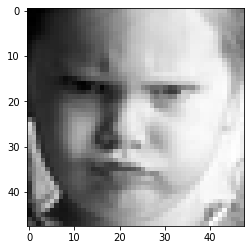

In [8]:
i=random.randint(0,35887)
face=np.array(faces[i])
emo=emos[i]
img=face.reshape(48,48)
plt.imshow(img,cmap='gray')
face=np.expand_dims(face, axis=0)
probability=model.predict(face)
probability=probability.flatten()
probability=probability.tolist()
for i in probability:
    if i==max(probability):
        print('[ '+emotion[probability.index(i)]+': '+"%.4f"%(i*100)+"% ]")
    else:
        print('  '+emotion[probability.index(i)]+': '+"%.4f"%(i*100)+"%")
print('\nLabel : ',emotion[emo])

  Angry: 10.6723%
  Disgust: 0.8490%
  Fear: 12.0398%
[ Happy: 25.6928% ]
  Sad: 25.0521%
  Surprise: 1.7644%
  Neutral: 23.9296%


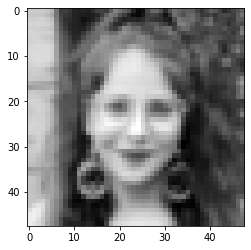

In [12]:
#CustomTest
def load(filename):
    img = Image.open(filename)
    img = np.array(img).astype('float64')        #(x, x, 3) for RGB                      
    img=img[:,:,1]                               #(x, x)
    img = transform.resize(img, (48,48))         #(48, 48)
    plt.imshow(img, cmap='gray')   
    img=img.reshape(2304,1)                      #(2304, 1)
    img=np.expand_dims(img, axis=0)
    return img

image = load('./t.png')               
probability=model.predict(image)
probability=probability.flatten()
probability=probability.tolist()
for i in probability:
    if i==max(probability):
        print('[ '+emotion[probability.index(i)]+': '+"%.4f"%(i*100)+"% ]")
    else:
        print('  '+emotion[probability.index(i)]+': '+"%.4f"%(i*100)+"%")